***
Welcome to this notebook where we will delve into the NLTK Tokenization function, specifically focusing on sentence and word tokenization. Throughout our exploration, we will engage in small exercises that rely on our tokenizations. Moreover, we will also explore the FreqDist function, which aids us in counting word occurrences in given texts.
***

### Index:

[1.1 - Sent Tokenizer](#1.1---Sent-Tokenizer)
<br>
[1.2 - Word Tokenizer](#1.2---Word-Tokenizer)
<br>
[1.3 - Use Case: Counting number of number occurences in a Word](#1.3---Use-Case---Counting-number-of-number-occurences-in-a-Word)
<br>
[1.4 - Frequency of Words](#1.4---Frequency-of-Words)



In [2]:
# NLTK Stands for Natural Language Toolkit
import nltk

Let's start by defining a long sentence with the `European Union` definition:

In [3]:
eu_definition = '''
The European Union (EU) is a political and economic union of 27 member states that are located primarily 
in Europe. Its members have a combined area of 4,233,255.3 km2 (1,634,469.0 sq mi) and an estimated total 
population of about 447 million. The EU has developed an internal single market through a standardised system of 
laws that apply in all member states in those matters, and only those matters, where members have agreed to act as one. 
EU policies aim to ensure the free movement of people, goods, services and capital within the internal market;
enact legislation in justice and home affairs; and maintain common policies on trade, agriculture, 
fisheries and regional development. Passport controls have been abolished for travel within the Schengen Area.
A monetary union was established in 1999, coming into full force in 2002, and is composed of 19 EU 
member states which use the euro currency. The EU has often been described as a sui generis political entity 
(without precedent or comparison).
'''

### 1 - Tokenization

### 1.1 - Sent Tokenizer

**Let's try to split this into sentences by using the `split` method directly:**

In [4]:
eu_definition.split('.')

['\nThe European Union (EU) is a political and economic union of 27 member states that are located primarily \nin Europe',
 ' Its members have a combined area of 4,233,255',
 '3 km2 (1,634,469',
 '0 sq mi) and an estimated total \npopulation of about 447 million',
 ' The EU has developed an internal single market through a standardised system of \nlaws that apply in all member states in those matters, and only those matters, where members have agreed to act as one',
 ' \nEU policies aim to ensure the free movement of people, goods, services and capital within the internal market;\nenact legislation in justice and home affairs; and maintain common policies on trade, agriculture, \nfisheries and regional development',
 ' Passport controls have been abolished for travel within the Schengen Area',
 '\nA monetary union was established in 1999, coming into full force in 2002, and is composed of 19 EU \nmember states which use the euro currency',
 ' The EU has often been described as a sui ge

As we can see from the code above, sentences are cut on weird places as we have points separating decimal places. 
<br>
<br>
**Let's see what NLTK `sent_tokenize` does for us:**

In [5]:
nltk.tokenize.sent_tokenize(eu_definition)

['\nThe European Union (EU) is a political and economic union of 27 member states that are located primarily \nin Europe.',
 'Its members have a combined area of 4,233,255.3 km2 (1,634,469.0 sq mi) and an estimated total \npopulation of about 447 million.',
 'The EU has developed an internal single market through a standardised system of \nlaws that apply in all member states in those matters, and only those matters, where members have agreed to act as one.',
 'EU policies aim to ensure the free movement of people, goods, services and capital within the internal market;\nenact legislation in justice and home affairs; and maintain common policies on trade, agriculture, \nfisheries and regional development.',
 'Passport controls have been abolished for travel within the Schengen Area.',
 'A monetary union was established in 1999, coming into full force in 2002, and is composed of 19 EU \nmember states which use the euro currency.',
 'The EU has often been described as a sui generis polit

How the sent tokenizer works, directly from the NLTK documentation:

*A sentence tokenizer which uses an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences; and then uses that model to find sentence boundaries. This approach has been shown to work well for many European languages.*

The *sent_tokenize* function uses an instance of `PunktSentenceTokenizer`(https://www.nltk.org/api/nltk.tokenize.PunktSentenceTokenizer.html) from the `nltk.tokenize.punkt module`.
<br>
<br>
This is what we normally call a pre-trained model.

### 1.2 - Word Tokenizer

Word tokenizer enables us to tokenize a sentence according to it's words and punctuation:

In [6]:
tokenize_sentence = nltk.tokenize.sent_tokenize(eu_definition)

In [7]:
# Tokenizing first sentence:
nltk.tokenize.word_tokenize(tokenize_sentence[0])

['The',
 'European',
 'Union',
 '(',
 'EU',
 ')',
 'is',
 'a',
 'political',
 'and',
 'economic',
 'union',
 'of',
 '27',
 'member',
 'states',
 'that',
 'are',
 'located',
 'primarily',
 'in',
 'Europe',
 '.']

In [8]:
# Tokenizing second sentence:
nltk.tokenize.word_tokenize(tokenize_sentence[1])

['Its',
 'members',
 'have',
 'a',
 'combined',
 'area',
 'of',
 '4,233,255.3',
 'km2',
 '(',
 '1,634,469.0',
 'sq',
 'mi',
 ')',
 'and',
 'an',
 'estimated',
 'total',
 'population',
 'of',
 'about',
 '447',
 'million',
 '.']

Word tokenizer uses the Default/TreeBank Tokenizer but there's other alternatives:

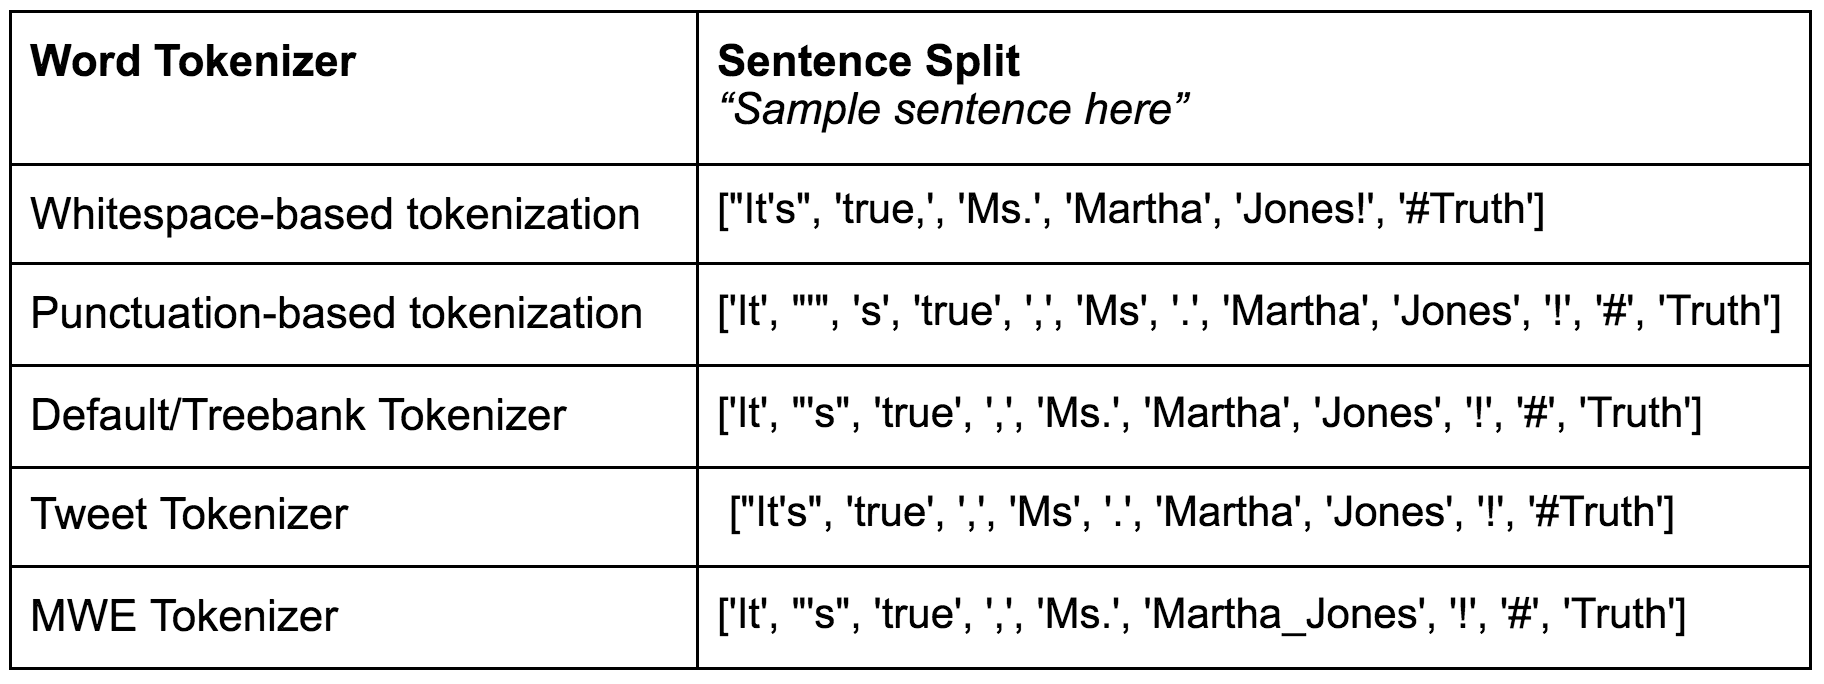

For example, let's see the `whitespace-based tokenization`. An example of whitespace-based tokenization based on Python Default string methods is done by directly calling the `split` method:

In [9]:
tokenize_sentence[1].split(" ")

['Its',
 'members',
 'have',
 'a',
 'combined',
 'area',
 'of',
 '4,233,255.3',
 'km2',
 '(1,634,469.0',
 'sq',
 'mi)',
 'and',
 'an',
 'estimated',
 'total',
 '\npopulation',
 'of',
 'about',
 '447',
 'million.']

### 1.3 - Use Case - Counting number of number occurences in a Word

**After tokenization we can already produce some interesting stuff using Python. Let's count the number of "numbers" that each sentence has with a simple code.**
<br>
<br>
Let's also learn a new method for strings and use the string library! There's a much efficient way to do this but let's take it slowly and see this step-by-step.
<br>
<br>
*Note: This use case is not followed along in the video lectures and is aimed at a self-learning process.*

In [10]:
import string

In [11]:
# String punctuation method let us conveniently assess punctuation:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

**I can turn the string above into a list:**

In [12]:
list(string.punctuation)

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [13]:
# Initializing our sentence as empty
my_sentence = []

# For each word in the second sentence of
# the tokens
for word in tokenize_sentence[1].split(" "):
    # replace the punctuation with nothing
    for punct in list(string.punctuation):
        word = word.replace(punct,'')
    
    print('The word {} is alpha: {}'.format(word.strip(), word.isalpha()))

The word Its is alpha: True
The word members is alpha: True
The word have is alpha: True
The word a is alpha: True
The word combined is alpha: True
The word area is alpha: True
The word of is alpha: True
The word 42332553 is alpha: False
The word km2 is alpha: False
The word 16344690 is alpha: False
The word sq is alpha: True
The word mi is alpha: True
The word and is alpha: True
The word an is alpha: True
The word estimated is alpha: True
The word total is alpha: True
The word population is alpha: False
The word of is alpha: True
The word about is alpha: True
The word 447 is alpha: False
The word million is alpha: True


Notice how `population` is not alpha. To our human eye it seems alpha but there is a slight weird thing in there - notice that `\n` right there. If we use Python notebooks output:

In [14]:
tokenize_sentence[1].split(" ")[16]

'\npopulation'

But if we use print:

In [15]:
print(tokenize_sentence[1].split(" ")[16])


population


Given that, let's also replace the `\n's` in our sentences.

In [16]:
my_sentence = []

for word in tokenize_sentence[1].split(" "):
    for punct in list(string.punctuation):
        word = word.replace(punct,'')
        word = word.replace('\n','')
    
    print('The word {} is alpha: {}'.format(word.strip(), word.isalpha()))

The word Its is alpha: True
The word members is alpha: True
The word have is alpha: True
The word a is alpha: True
The word combined is alpha: True
The word area is alpha: True
The word of is alpha: True
The word 42332553 is alpha: False
The word km2 is alpha: False
The word 16344690 is alpha: False
The word sq is alpha: True
The word mi is alpha: True
The word and is alpha: True
The word an is alpha: True
The word estimated is alpha: True
The word total is alpha: True
The word population is alpha: True
The word of is alpha: True
The word about is alpha: True
The word 447 is alpha: False
The word million is alpha: True


The is numeric method helps us check if a string is numeric (notice that it is still relevant to replace the `-` and `.` because -1 and 1.020 would not be considered numbers by Python if we didn't do that!):

In [17]:
numbers = 0

for word in tokenize_sentence[1].split(" "):
    for punct in list(string.punctuation):
        word = word.replace(punct,'')
    
    if word.isnumeric():
        numbers+=1

print(numbers)

3


**We were able to check that there are 3 numbers in the sentence!**

### 1.4 - Frequency of Words

A really cool distribution function is the `FreqDist` function from nltk probability module.

In [18]:
from nltk.probability import FreqDist

In [19]:
tokenized_sent_word = nltk.word_tokenize(eu_definition)

**We can pass a tokenized text in word version to the FreqDist function:**

In [20]:
frequency = FreqDist(tokenized_sent_word)

Let's check the 10 most common words:

In [21]:
frequency.most_common(10)

[('and', 8),
 (',', 8),
 ('.', 7),
 ('of', 6),
 ('in', 6),
 ('EU', 5),
 ('a', 4),
 ('the', 4),
 ('The', 3),
 ('(', 3)]

We can also convert this dictionary into a Data Frame pretty quickly:

In [1]:
import pandas as pd
word_counts = pd.DataFrame.from_dict(frequency.items())

NameError: name 'frequency' is not defined

In [ ]:
word_counts.columns = ['Word','Word_Count']

In [ ]:
word_counts.sort_values(by='Word_Count', ascending=False).head(20)

,Word,Word_Count
53,",",8
9,and,8
22,.,7
12,of,6
20,in,6
4,EU,5
7,a,4
64,the,4
25,have,3
15,states,3
